In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Q1 and Q2) Loading the dataset

In [ ]:
df=pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Q3) Visualizations

### 1. Univariate Analysis

#### 1-Pie Chart

In [ ]:
df['species'].nunique()

3

In [ ]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

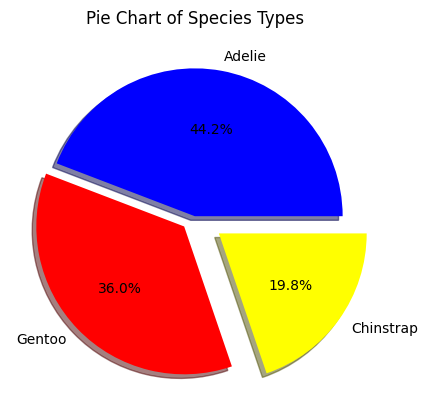

In [ ]:
plt.pie(df['species'].value_counts(),[0,0.1,0.2],labels=['Adelie','Gentoo','Chinstrap'],autopct='%1.1f%%',shadow=True,colors=['blue','red','yellow'])
plt.title('Pie Chart of Species Types')
plt.show()

In [ ]:
df['island'].nunique()

3

In [ ]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

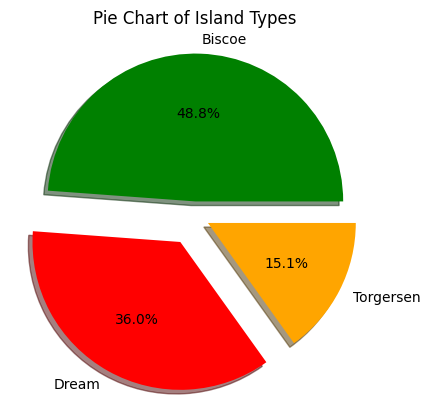

In [ ]:
plt.pie(df['island'].value_counts(),[0.1,0.2,0.1],labels=['Biscoe','Dream','Torgersen'],autopct='%1.1f%%',shadow=True,colors=['green','red','orange'])
plt.title('Pie Chart of Island Types')
plt.show()

#### 2-Bar Plot

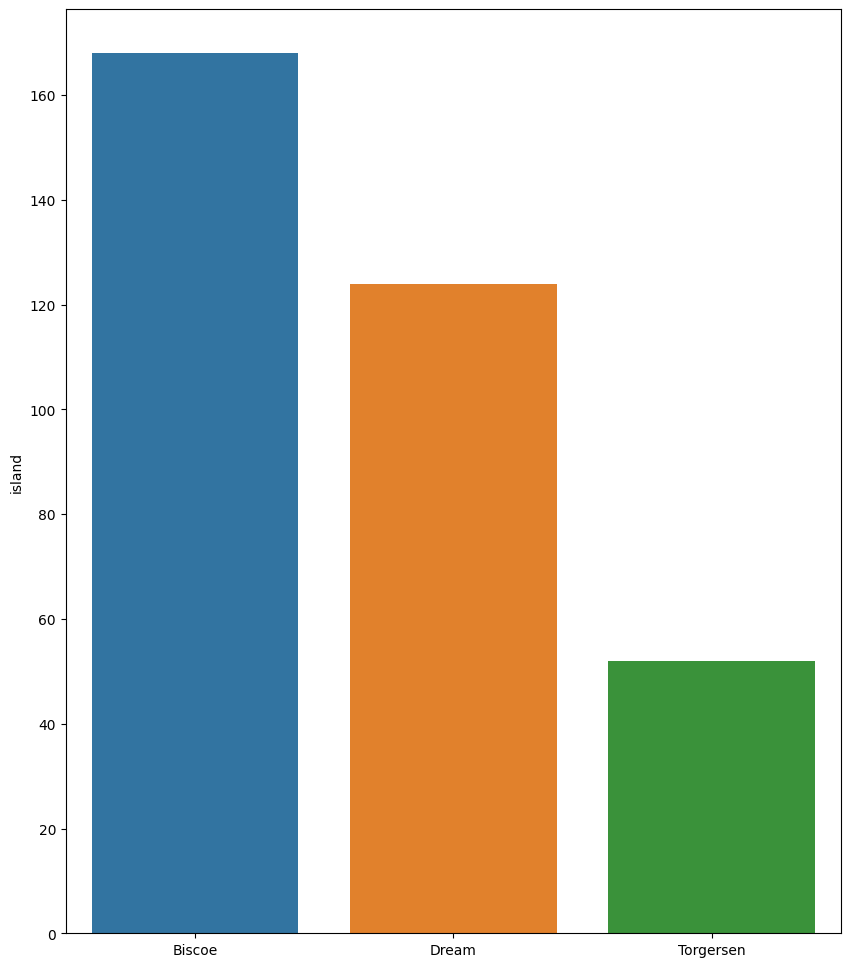

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(x=df['island'].value_counts().index,y=df['island'].value_counts())
plt.show()

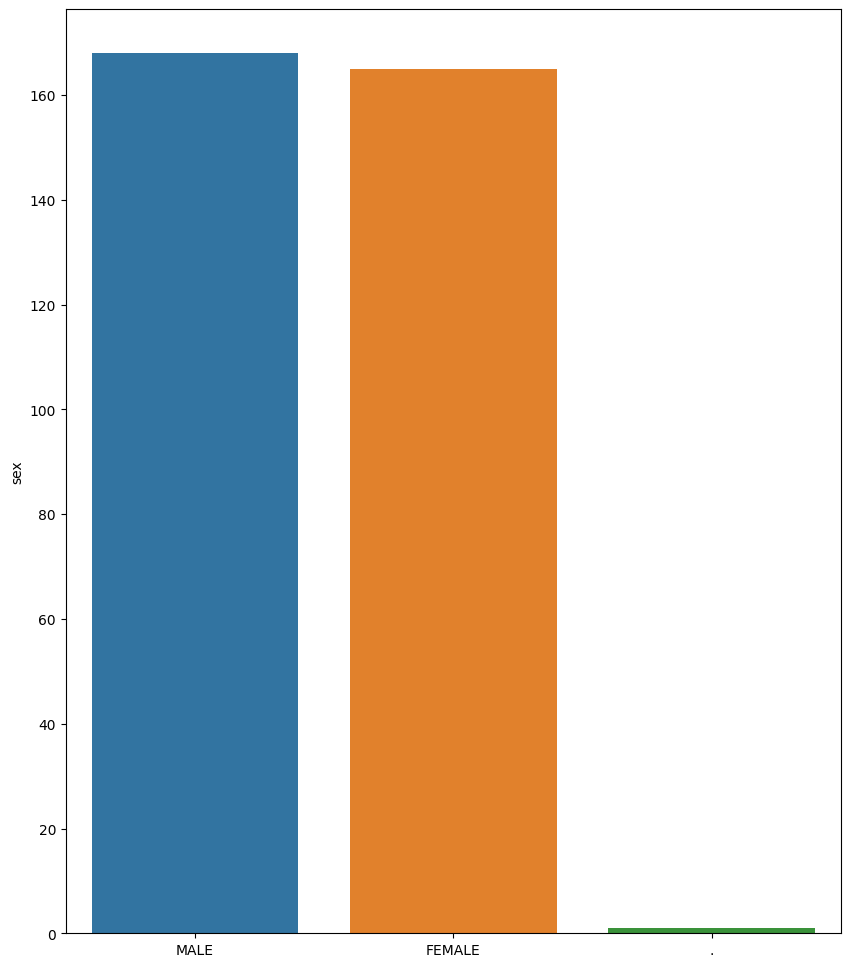

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(x=df['sex'].value_counts().index,y=df['sex'].value_counts())
plt.show()

### 2. Bivariate Analysis

#### 1-Joint Plot

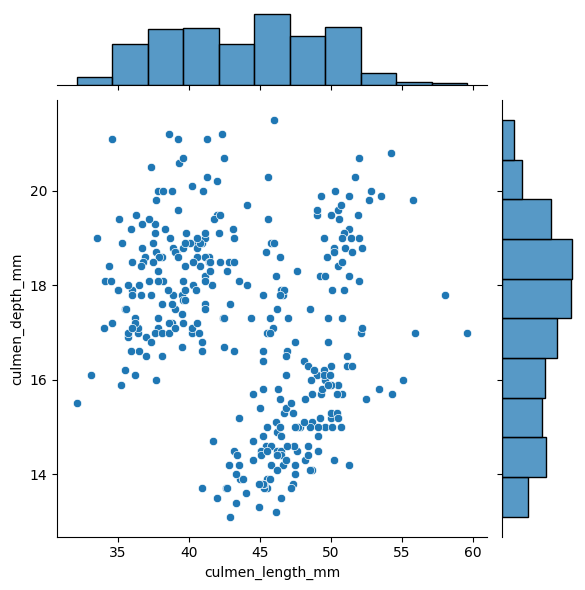

In [ ]:
sns.jointplot(x="culmen_length_mm",y="culmen_depth_mm",data=df)
plt.show()

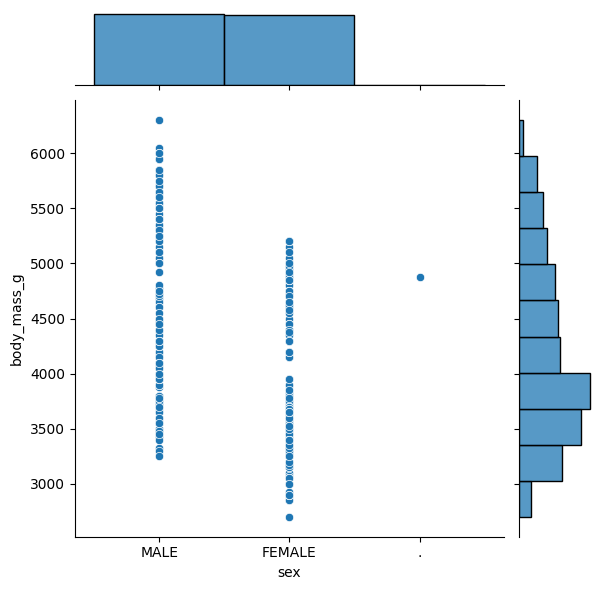

In [ ]:
sns.jointplot(x="sex",y="body_mass_g",data=df)
plt.show()

2-Line plot

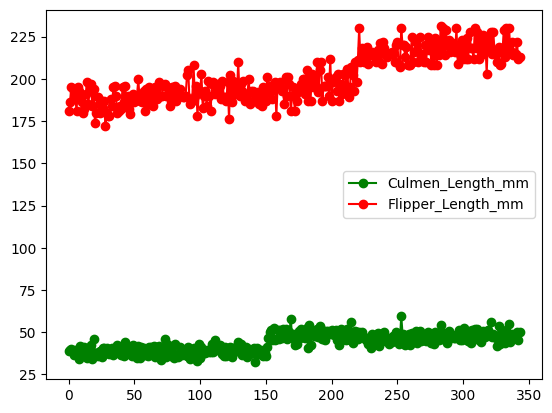

In [ ]:
line1=df['culmen_length_mm']
line2=df['flipper_length_mm']
line3=df['sex']
plt.plot(line1,'o-g')
plt.plot(line2,'o-r')
plt.legend(['Culmen_Length_mm','Flipper_Length_mm'])
plt.show()

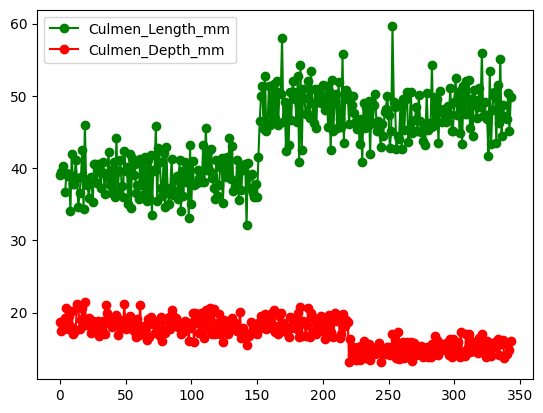

In [ ]:
line1=df['culmen_length_mm']
line2=df['culmen_depth_mm']
line3=df['sex']
plt.plot(line1,'o-g')
plt.plot(line2,'o-r')
plt.legend(['Culmen_Length_mm','Culmen_Depth_mm'])
plt.show()

### 3. Multivariate Analysis

#### 1-Pair Plot

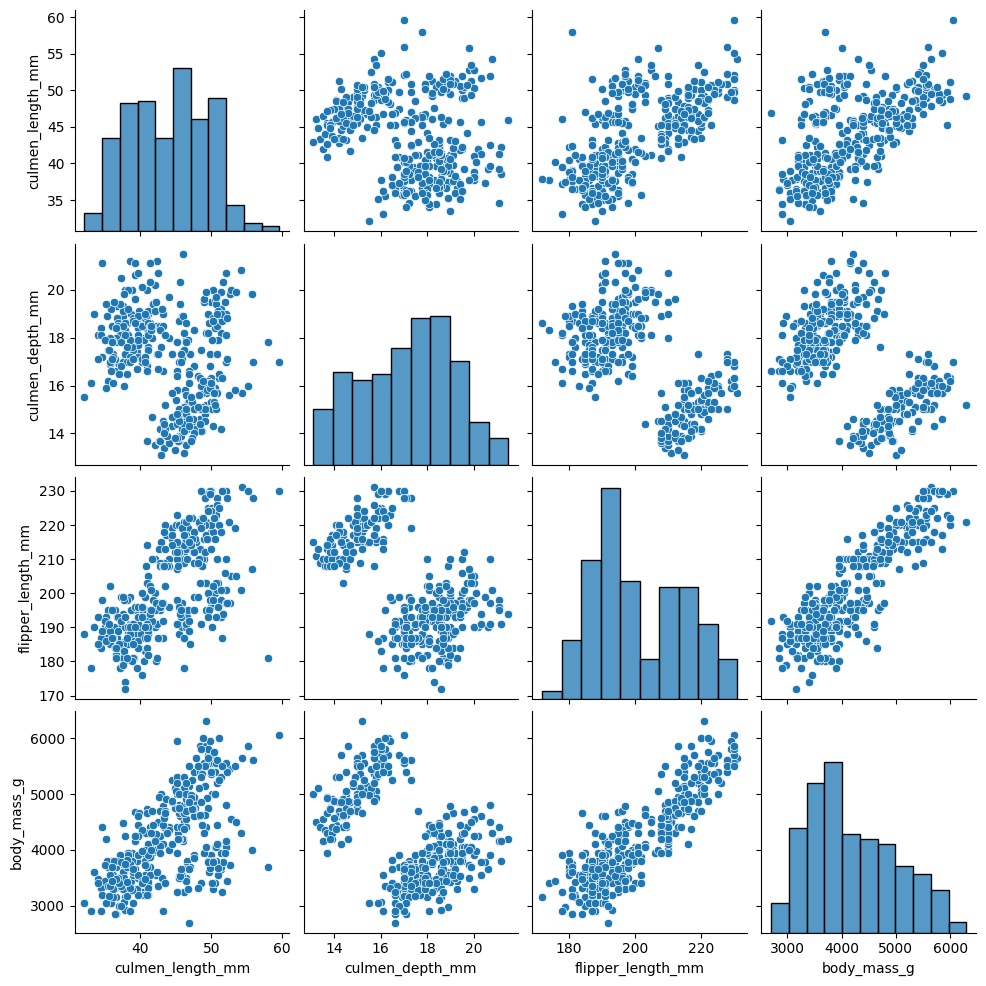

In [ ]:
sns.pairplot(df)
plt.show()

2- Heat Map

<ipython-input-50-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


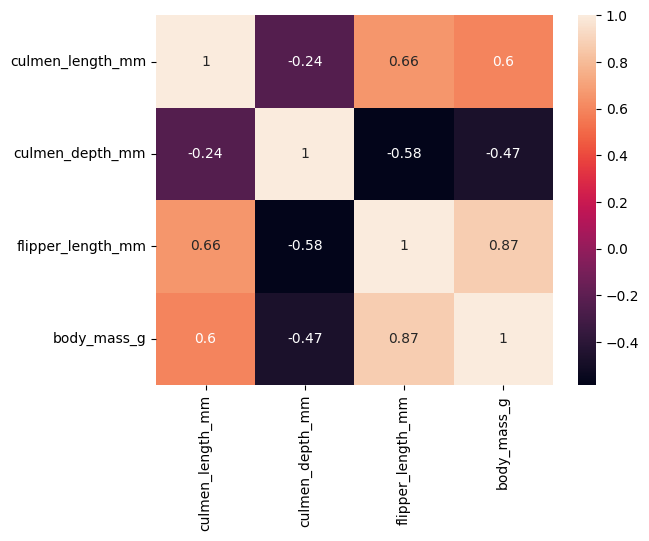

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## Q4) Descriptive Statistics

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Q5) Checking and Dealing with Missing Values

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace=True)
df['sex'].fillna(df['sex'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
df['sex'].value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [ ]:
df['sex'].replace('.',df['sex'].mode()[0])

0        MALE
1      FEMALE
2      FEMALE
3        MALE
4      FEMALE
        ...  
339      MALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [ ]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Q6) Outlier Detection and Replacement

<Axes: >

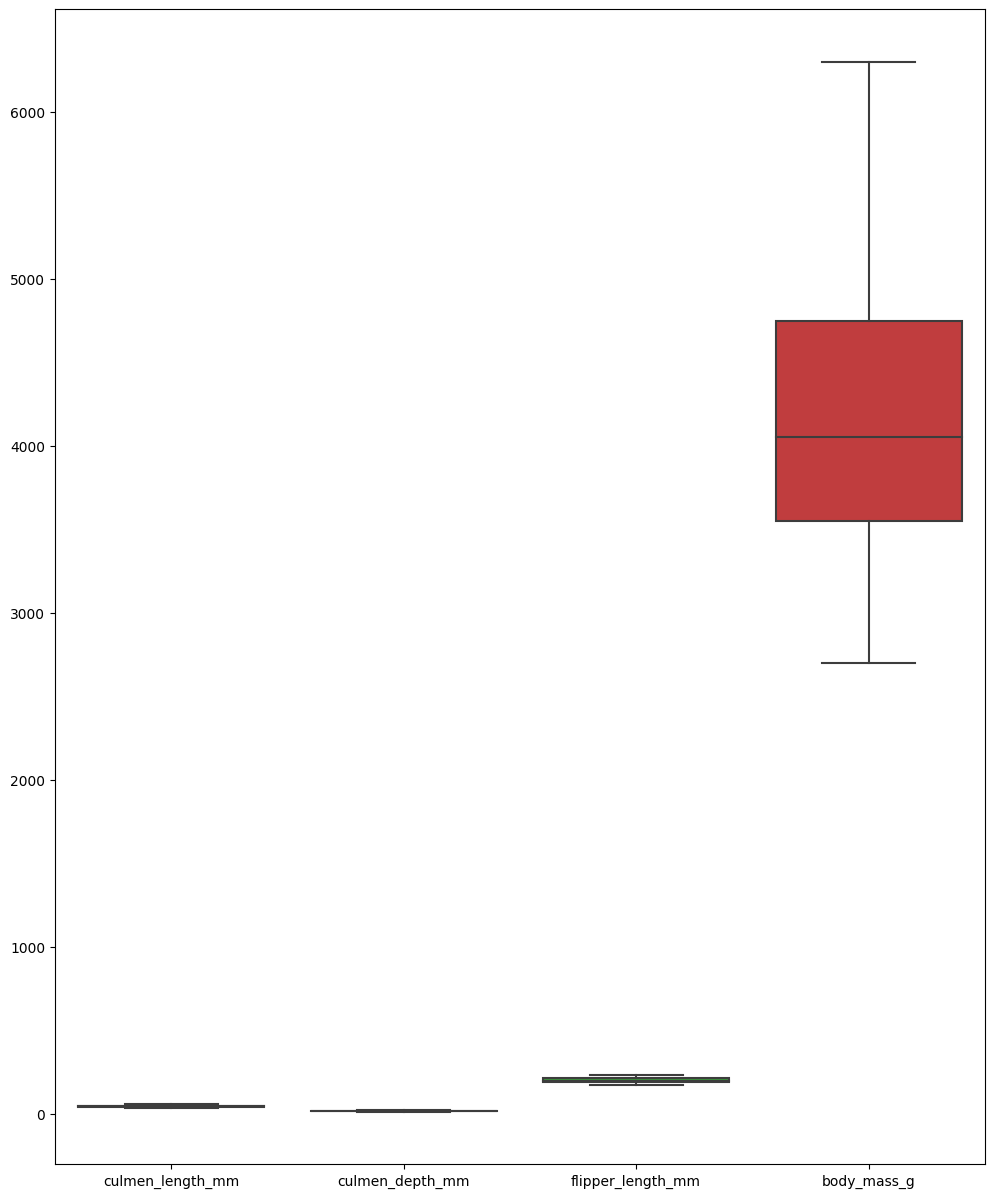

In [ ]:
plt.figure(figsize=(12,15))
sns.boxplot(df)

In [ ]:
# No outliers, hence no replacement required

## Q8) Encoding of Categorical Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['species']=le.fit_transform(df['species'])
df['island']=le.fit_transform(df['island'])
df['sex']=le.fit_transform(df['sex'])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,2
1,0,2,39.50,17.4,186.0,3800.0,1
2,0,2,40.30,18.0,195.0,3250.0,1
3,0,2,44.45,17.3,197.0,4050.0,2
4,0,2,36.70,19.3,193.0,3450.0,1


## Q7) Correlation of independent variable with target variable

In [ ]:
df.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                 -0.003823
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

<Axes: >

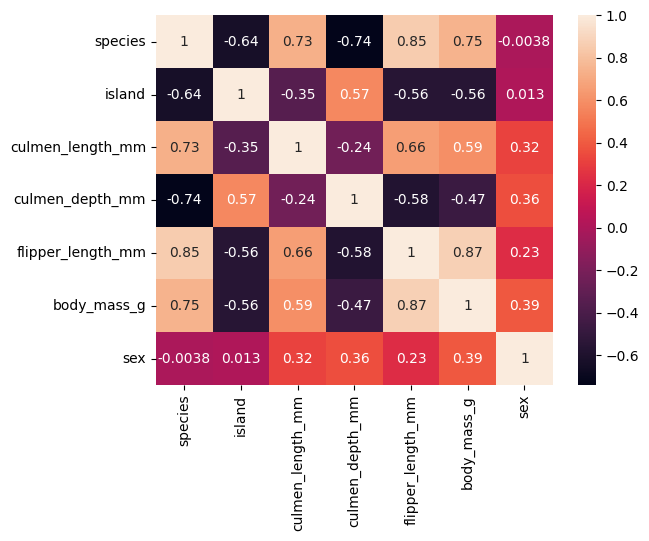

In [ ]:
sns.heatmap(df.corr(),annot=True)

## Q9) Splitting dataframe into independent and dependent variables

In [ ]:
X=df.drop(columns=['species'],axis=1)
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,2
1,2,39.50,17.4,186.0,3800.0,1
2,2,40.30,18.0,195.0,3250.0,1
3,2,44.45,17.3,197.0,4050.0,2
4,2,36.70,19.3,193.0,3450.0,1


In [ ]:
Y=df['species']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

## Q10) Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()

X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.844076,-0.887622,0.787289,-1.420541,-0.564625,0.960230
1,1.844076,-0.814037,0.126114,-1.063485,-0.502010,-1.017729
2,1.844076,-0.666866,0.431272,-0.420786,-1.190773,-1.017729
3,1.844076,0.096581,0.075255,-0.277964,-0.188936,0.960230
4,1.844076,-1.329133,1.092447,-0.563608,-0.940314,-1.017729


## Q11) Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=0)

## Q12) Training and Testing data shape

In [ ]:
X_train.shape

(275, 6)

In [ ]:
X_test.shape

(69, 6)

In [ ]:
Y_train.shape

(275,)

In [ ]:
Y_test.shape

(69,)